# Explaination on Mitotic stage classification

## References

**Summary of Explainable methods**
- A Brief History of Machine Learning Models Explainability. ([link](https://medium.com/@Zelros/a-brief-history-of-machine-learning-models-explainability-f1c3301be9dc))
- https://notebooks.azure.com/denfromufa/projects/SHAP

**LIME Algorithm**
- USING LIME FOR IMAGE CLASSIFICATION EXPLAINABILITY 
    - [Part I](https://www.braincreators.com/2018/06/image-classification-explainability-lime/)
- Python LIME library - A Tutorial ([link](https://github.com/marcotcr/lime/blob/master/doc/notebooks/Tutorial%20-%20Image%20Classification%20Keras.ipynb))
- Explainable model. Youtube 李弘毅. ([link](https://www.youtube.com/watch?v=OjqIVSwly4k&t=1s), [link](https://www.youtube.com/watch?v=K1mWgthGS-A))

**SHAP Alogrithm**
- SHAP Library ([link](https://github.com/slundberg/shap))
- SHAP Tutorial ([link](https://slundberg.github.io/shap/notebooks/deep_explainer/Front%20Page%20DeepExplainer%20MNIST%20Example.html))
- SHAP Paper ([link](https://arxiv.org/pdf/1705.07874.pdf))

**Compare SHAP with LIME**
- SHAP and LIME Python Libraries. ([link](https://blog.dominodatalab.com/shap-lime-python-libraries-part-1-great-explainers-pros-cons/))

**Class activation maps (CAM)**
- CAM in keras. ([link](https://raghakot.github.io/keras-vis/visualizations/class_activation_maps/))
- Saliency map. ([link](https://raghakot.github.io/keras-vis/visualizations/saliency/))

**Saliency Map**
- Notebook of neuroimage. ([link](https://colab.research.google.com/drive/1EgdnWZeNqmzqEmnSR9PUnYXlTjeu1wAU#scrollTo=RWyJftrVDY9-&forceEdit=true&offline=true&sandboxMode=true))

## Data 
- Model and data: [link](https://drive.google.com/open?id=1CotCCn9tnp0LS0RmSIqfQhr1LrqJt4OZ&authuser=b03901045@g.ntu.edu.tw&usp=drive_fs)
- This notebook(.ipynb): [link](https://drive.google.com/open?id=1JijG5trdClL3TQv0SWvWB30u-frVKy4Z&authuser=b03901045@g.ntu.edu.tw&usp=drive_fs)


In [6]:
import os 
import pickle
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from skimage import data, color
from skimage import measure
from skimage.color import gray2rgb
from keras.models import load_model


In [7]:
def setpath():
    path = {
            'model': '../Report_2_1_Automatic-Cell-Stage-Classification_nucleus_only/model/seq_acu_95.h5',
            'test_x': '../Report_2_1_Automatic-Cell-Stage-Classification_nucleus_only/model/seq_acu_95_test_x.pickle',
            'test_y': '../Report_2_1_Automatic-Cell-Stage-Classification_nucleus_only/model/seq_acu_95_test_y.pickle',
            'train_x':'../Report_2_1_Automatic-Cell-Stage-Classification_nucleus_only/model/seq_acu_95_train_x.pickle',
            'train_y':'../Report_2_1_Automatic-Cell-Stage-Classification_nucleus_only/model/seq_acu_95_train_y.pickle',
            'le':'../Report_2_1_Automatic-Cell-Stage-Classification_nucleus_only/model/seq_acu_95_encoder.pickle',
    }
    
    for key in path.keys(): # Check the paths are correct
        if os.path.isfile(path[key]):
            continue
        elif os.path.isdir(path[key]):
            continue
        else:
            raise ValueError
    
    return path

def get_data(pickle_path):
    assert os.path.isfile(pickle_path)
    data= []
    if '.pickle' in pickle_path:     
        with open(pickle_path,"rb") as pickle_in:
            data = pickle.load(pickle_in)
        return data
    else:
        raise ValueError

In [8]:
path = setpath()

In [9]:
# load model
model = load_model(path['model'])

# Load data
test_x = get_data(path['test_x'])
test_y = get_data(path['test_y'])
le = get_data(path['le'])

/Users/stevenchiu/miniconda3/envs/keras/lib/python3.6/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.20.2 when using version 0.21.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [10]:
test_x.shape

(3726, 1, 200, 230)

In [5]:
import shap
import numpy as np

# select a set of background examples to take an expectation over
background = test_x[np.random.choice(test_x.shape[0], 100, replace=False)]

# explain predictions of the model on three images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(test_x[1:5])



## SHAP Map

Should be like in [SHAP Library](https://github.com/slundberg/shap)
<img src="https://raw.githubusercontent.com/slundberg/shap/master/docs/artwork/mnist_image_plot.png">

However, the results shows that the model focuses on the edge.


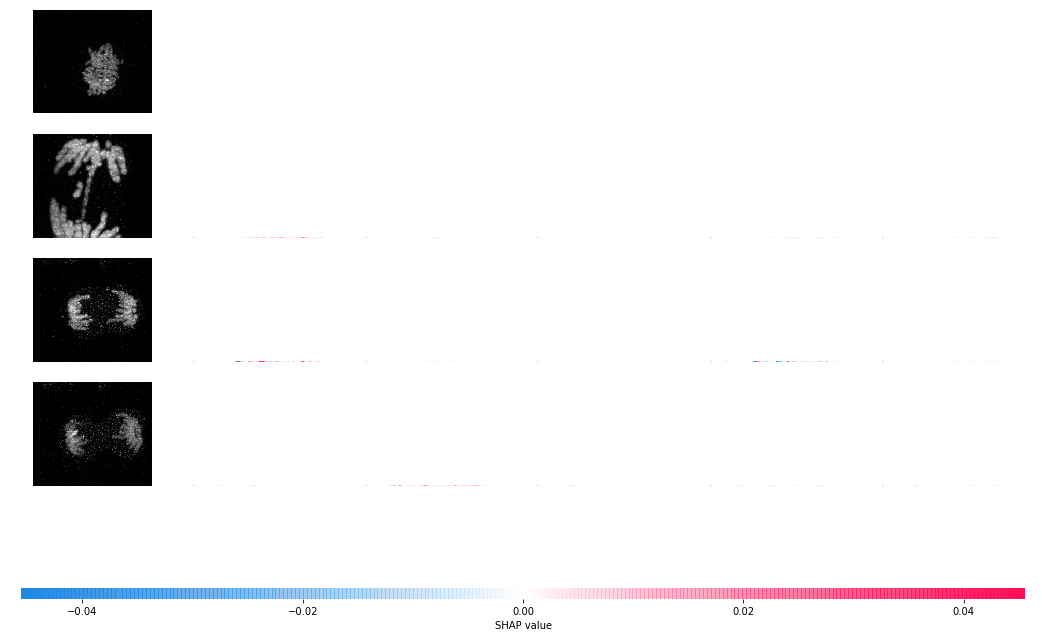

In [12]:
# plot the feature attributions
shap.image_plot(shap_values, test_x[100:104,0,:,:])

### Confirm model test accuracy again

In [13]:
# Confirm the model test accuracy
model.evaluate(test_x, test_y)

3726/3726 [==============================] - 60s 16ms/step


[0.11311475236030816, 0.954106280097255]

## LIME 

In [4]:
import lime
from lime import lime_image
from lime.wrappers.scikit_image import SegmentationAlgorithm

In [5]:
explainer = lime_image.LimeImageExplainer(verbose = False)
segmenter = SegmentationAlgorithm('quickshift', kernel_size=1, max_dist=200, ratio=0.2)

In [ ]:
test_x = get_data(path['test_x'])
model = load_model(path['model'])
le = get_data(path['le'])

In [8]:
preds = model.predict(test_x[0:1,:,:,:])

In [18]:
image = test_x[0,0,:,:]
explanation = explainer.explain_instance(image, 
                                         classifier_fn = model.predict_proba, 
                                         top_labels=5, 
                                         hide_color=0, 
                                         num_samples=10000, 
                                         segmentation_fn=segmenter)



ValueError: Error when checking input: expected conv2d_1_input to have shape (1, 200, 230) but got array with shape (200, 230, 3)

In [ ]:
model2 = model

In [25]:
model2.layers.pop()

In [19]:
from keras.engine import InputLayer

input_layer = InputLayer(input_shape=(None,200, 230, 3), name="input")
model2[0] = input_layer



TypeError: 'Sequential' object does not support item assignment

In [35]:
from numpy import moveaxis
from tensorflow.image import grayscale_to_rgb
test_x3 = moveaxis(test_x, 1, 3)
test_x3 = grayscale_to_rgb(test_x3)

In [36]:
test_x3.shape

TensorShape([Dimension(3726), Dimension(200), Dimension(230), Dimension(3)])

In [ ]:
plt.imshow(tf.Session().run(test_x3[0,:,:,:]))

## Saliency map - Keras

In [ ]:
from vis.visualization import visualize_saliency

In [ ]:
visualize_saliency(model=model, 
                   layer_idx=-3, 
                   filter_indices=None, 
                   seed_input=test_x[0:1,:,:,:]
)



In [ ]:
!pip install git+https://github.com/raghakot/keras-vis.git